In [1]:

import os, sys

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import cauchy
import numpy as np
from io import StringIO
import re

In [3]:
file = open("training.dat.txt","r")

In [4]:
def powerlaw(x,a,b,c):
    return a*x**b+c

In [5]:
def f5(x,a,b,c,d,g,h):
    return a*x**5+b*x**4+c*x**3+d*x**2+g*x+h

In [6]:
def f3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

In [7]:
def VowelToConsRatio(name):
    
    words = sum(c.isalpha() for c in name)
    spaces = sum(c.isspace() for c in name)
    others = len(name) - words - spaces
    vowels = sum(map(name.lower().count, "aeiou"))
    consonents = words - vowels


    return float(vowels)/float(consonents), float(spaces)/float(consonents), float(others)/float(consonents)

In [8]:
def AirportNameLetterFrequency(name):
    
    words = sum(c.isalpha() for c in name)
    spaces = sum(c.isspace() for c in name)
    others = len(name) - words - spaces
    vowels = sum(map(name.lower().count, "aeiou"))
    consonents = words - vowels
    #put a one at the end to account for one airport in number totaled. will be normalized later

    return [consonents, vowels, spaces, others, 1]

In [9]:
def MergeCount(totalCount, thisCount):
    totalCount2=totalCount+thisCount
    return totalCount2

In [10]:
totalUSAcount=np.zeros(5)
totalChinacount=np.zeros(5)
totalEnglandcount=np.zeros(5)
totalFrancecount=np.zeros(5)
totalGermanycount=np.zeros(5)
totalMexicocount=np.zeros(5)
totalCanadacount=np.zeros(5)



In [11]:
ratio=[]



for line in file:
    line=re.split(',',line);


    if line[3] == "\"China\"":
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])
    if line[3] == "\"United States\"":
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])
    if line[3] == "\"United Kingdom\"":
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])
    
    if line[3] == "\"France\"":
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])
    
    
    if line[3] == "\"Germany\"":#
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])
    
    if line[3] == "\"Mexico\"" :
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])
    if line[3] == "\"Canada\"" :
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])


ratioarray=np.asarray(ratio)
        
print ratioarray[1:3]



[[ 0.5         0.25        0.25      ]
 [ 0.55555556  0.22222222  0.16666667]]


In [13]:
km=KMeans(n_clusters=7,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km=km.fit_predict(ratioarray)

print y_km

[5 3 4 ..., 3 5 3]


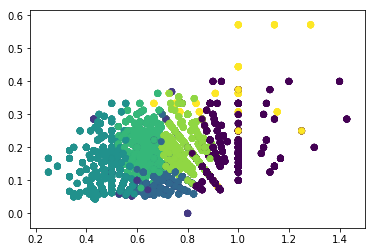

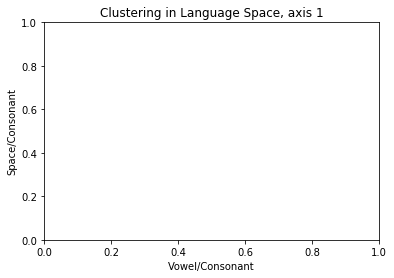

In [17]:
fig=plt.figure()
plt.figure()
ax=fig.gca()

for c in {'r','o','g','c','m','y','k'}:
    xs=ratioarray[:,0]
    ys=ratioarray[:,1]
    zs=ratioarray[:,2]
    ax.scatter(xs,ys,c=y_km)
plt.xlabel('Vowel/Consonant')
plt.ylabel('Space/Consonant')
plt.title('Clustering in Language Space, axis 1')
plt.show()



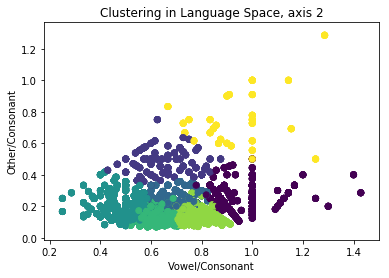

In [15]:
fig = plt.figure()
ax=fig.gca()

for c in {'r','o','g','c','m','y','k'}:
    xs=ratioarray[:,0]
    ys=ratioarray[:,1]
    zs=ratioarray[:,2]
    ax.scatter(xs,zs,c=y_km)
plt.xlabel('Vowel/Consonant')
plt.ylabel('Other/Consonant')
plt.title('Clustering in Language Space, axis 2')
plt.show()



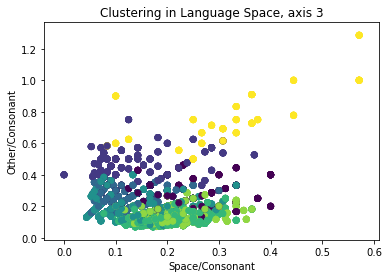

In [16]:
fig = plt.figure()
ax=fig.gca()

for c in {'r','o','g','c','m','y','k'}:
    xs=ratioarray[:,0]
    ys=ratioarray[:,1]
    zs=ratioarray[:,2]
    ax.scatter(ys,zs,c=y_km)
plt.xlabel('Space/Consonant')
plt.ylabel('Other/Consonant')
plt.title('Clustering in Language Space, axis 3')
plt.show()